In [1]:
import os

import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd

from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import (LinearLocator, MultipleLocator, FormatStrFormatter)
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
from matplotlib import gridspec
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

print("Package is ready.")

Package is ready.


In [2]:
plt.rcParams['figure.figsize'] = ((8/2.54), (6/2.54))
plt.rcParams["font.family"] = "Arial"
plt.rcParams["mathtext.default"] = "rm"
plt.rcParams.update({'font.size': 11})
MARKER_SIZE = 15
cmap_m = ["#f4a6ad", "#f6957e", "#fccfa2", "#8de7be", "#86d6f2", "#24a9e4", "#b586e0", "#d7f293"]
cmap = ["#e94d5b", "#ef4d28", "#f9a54f", "#25b575", "#1bb1e7", "#1477a2", "#a662e5", "#c2f442"]

plt.rcParams['axes.spines.top'] = False
# plt.rcParams['axes.edgecolor'] = 
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.width'] = 1

#  Fig. 1

In [3]:
weight_df = pd.read_csv('../ch2_weighing/results/2020_S/weight_ct.csv', index_col='Unnamed: 0')
weight_df.index = pd.DatetimeIndex(weight_df.index)
weight_df.index = np.append(weight_df.index[:-20], pd.DatetimeIndex(['2020-07-03']*20))

In [4]:
harvest_df = pd.read_excel('./data/harvest_FWnDW_2020S.xlsx', index_col='date', sheet_name='A2')

# fruit_df = weight_df[['Idv fruit FW', 'Fruit DW']].dropna()
# fruit_df.columns = harvest_df.columns

# harvest_df = pd.concat([harvest_df, fruit_df], axis=0)
harvest_df = harvest_df.sort_index()
# harvest_df = harvest_df.iloc[3:]

In [5]:
roots_DW = np.array([301.25, 293.55, 315.15, 356.45, 341.55, 267.65, 303.55, 231.05, 253.05, 272.35, 334.35])/1000
roots_DW_mean = roots_DW.mean()
rs_ratio_df = pd.DataFrame([0.23255813953488372, 0.14789272030651343, 0.11954022988505748, 0.13678160919540233, 0.2835814088817321], index=weight_df.index.unique(), columns=['RS_ratio'])
DW_sum_df = weight_df[[col for col in weight_df.columns if col.endswith('DW')]].sum(axis=1).groupby(weight_df.index).mean()

In [6]:
roots_df = (DW_sum_df.T * rs_ratio_df.T).T
roots_df.columns = ['root DW']
roots_df['root FW'] = roots_df['root DW']/0.1325
roots_df.index = pd.DatetimeIndex(roots_df.index)

In [7]:
weight_df = pd.concat([weight_df, roots_df], axis=1)

In [8]:
weight_df.columns

Index(['Stem FW', 'Leaf FW', 'petiole FW', 'Fruit count', 'Idv fruit FW',
       'Plant height', 'Fruit DW', 'Leaf DW', 'Stem DW', 'petiole DW',
       'root DW', 'root FW'],
      dtype='object')

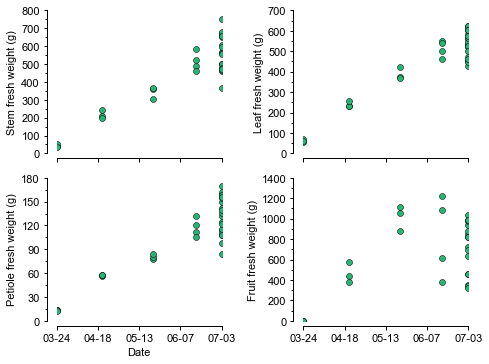

In [9]:
fig = plt.figure(figsize=((8/2.54*2.2), (6/2.54*2.2)))
grid = plt.GridSpec(2, 2)

ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])
ax2 = plt.subplot(grid[2])
ax3 = plt.subplot(grid[3])

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 10))
ax0.spines['bottom'].set_position(('outward', 5))
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_position(('outward', 10))
ax1.spines['bottom'].set_position(('outward', 5))
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_position(('outward', 10))
ax2.spines['bottom'].set_position(('outward', 5))
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_position(('outward', 10))
ax3.spines['bottom'].set_position(('outward', 5))

ax0.plot(weight_df.index, weight_df['Stem FW'], 'o', mec='k', mew=0.5, c=cmap[3])
ax1.plot(weight_df.index, weight_df['Leaf FW'], 'o', mec='k', mew=0.5, c=cmap[3])
ax2.plot(weight_df.index, weight_df['petiole FW'], 'o', mec='k', mew=0.5, c=cmap[3])
ax3.plot(weight_df.index, weight_df['Idv fruit FW'], 'o', mec='k', mew=0.5, c=cmap[3])

ax0.set_xbound(weight_df.index.min(), weight_df.index.max())
ax0.xaxis.set_major_locator(LinearLocator(5))
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xbound(weight_df.index.min(), weight_df.index.max())
ax1.xaxis.set_major_locator(LinearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax2.set_xbound(weight_df.index.min(), weight_df.index.max())
ax2.xaxis.set_major_locator(LinearLocator(5))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax3.set_xbound(weight_df.index.min(), weight_df.index.max())
ax3.xaxis.set_major_locator(LinearLocator(5))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax0.yaxis.set_major_locator(LinearLocator(9))
ax0.yaxis.set_minor_locator(LinearLocator(17))
ax0.set_ybound(0, 800)
ax1.yaxis.set_major_locator(LinearLocator(8))
ax1.yaxis.set_minor_locator(LinearLocator(15))
ax1.set_ybound(0, 700)
ax2.yaxis.set_major_locator(LinearLocator(7))
ax2.yaxis.set_minor_locator(LinearLocator(13))
ax2.set_ybound(0, 180)
ax3.yaxis.set_major_locator(LinearLocator(8))
ax3.yaxis.set_minor_locator(LinearLocator(15))
ax3.set_ybound(0, 1400)

ax0.set_ylabel('Stem fresh weight (g)')
ax1.set_ylabel('Leaf fresh weight (g)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Petiole fresh weight (g)')
ax3.set_ylabel('Fruit fresh weight (g)')

ax0.axes.xaxis.set_ticklabels([])
ax1.axes.xaxis.set_ticklabels([])

fig.tight_layout()
fig.savefig('./figures/Fig1-1.svg', transparent=True, format='svg')
plt.show()

# 파프리카는 무한생장하니까 리니어에 가까울 것이다?

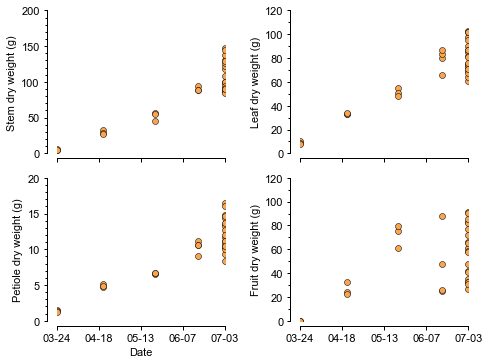

In [10]:
fig = plt.figure(figsize=((8/2.54*2.2), (6/2.54*2.2)))
grid = plt.GridSpec(2, 2)

ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])
ax2 = plt.subplot(grid[2])
ax3 = plt.subplot(grid[3])

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 10))
ax0.spines['bottom'].set_position(('outward', 5))
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_position(('outward', 10))
ax1.spines['bottom'].set_position(('outward', 5))
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_position(('outward', 10))
ax2.spines['bottom'].set_position(('outward', 5))
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_position(('outward', 10))
ax3.spines['bottom'].set_position(('outward', 5))

ax0.plot(weight_df.index, weight_df['Stem DW'], 'o', mec='k', mew=0.5, c=cmap[2])
ax1.plot(weight_df.index, weight_df['Leaf DW'], 'o', mec='k', mew=0.5, c=cmap[2])
ax2.plot(weight_df.index, weight_df['petiole DW'], 'o', mec='k', mew=0.5, c=cmap[2])
ax3.plot(weight_df.index, weight_df['Fruit DW'], 'o', mec='k', mew=0.5, c=cmap[2])

ax0.set_xbound(weight_df.index.min(), weight_df.index.max())
ax0.xaxis.set_major_locator(LinearLocator(5))
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xbound(weight_df.index.min(), weight_df.index.max())
ax1.xaxis.set_major_locator(LinearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax2.set_xbound(weight_df.index.min(), weight_df.index.max())
ax2.xaxis.set_major_locator(LinearLocator(5))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax3.set_xbound(weight_df.index.min(), weight_df.index.max())
ax3.xaxis.set_major_locator(LinearLocator(5))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax0.yaxis.set_major_locator(LinearLocator(5))
ax0.yaxis.set_minor_locator(LinearLocator(21))
ax0.set_ybound(0, 200)
ax1.yaxis.set_major_locator(LinearLocator(7))
ax1.yaxis.set_minor_locator(LinearLocator(13))
ax1.set_ybound(0, 120)
ax2.yaxis.set_major_locator(LinearLocator(5))
ax2.yaxis.set_minor_locator(LinearLocator(21))
ax2.set_ybound(0, 20)
ax3.yaxis.set_major_locator(LinearLocator(7))
ax3.yaxis.set_minor_locator(LinearLocator(13))
ax3.set_ybound(0, 120)

ax0.set_ylabel('Stem dry weight (g)')
ax1.set_ylabel('Leaf dry weight (g)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Petiole dry weight (g)')
ax3.set_ylabel('Fruit dry weight (g)')

ax0.axes.xaxis.set_ticklabels([])
ax1.axes.xaxis.set_ticklabels([])

fig.tight_layout()
fig.savefig('./figures/Fig1-2.svg', transparent=True, format='svg')
plt.show()

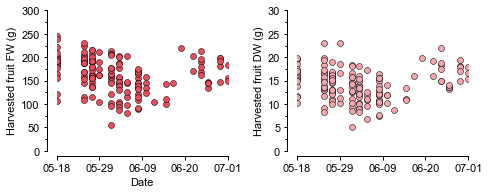

In [11]:
fig = plt.figure(figsize=((8/2.54*2.2), (6/2.54*1.2)))
grid = plt.GridSpec(1, 2)

ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 10))
ax0.spines['bottom'].set_position(('outward', 5))
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_position(('outward', 10))
ax1.spines['bottom'].set_position(('outward', 5))

ax0.plot(harvest_df.index, harvest_df['fw'], 'o', mec='k', mew=0.5, c=cmap[0])
ax1.plot(harvest_df.index, harvest_df['dw'], 'o', mec='k', mew=0.5, c=cmap_m[0])

ax0.set_xbound(harvest_df.index.min(), harvest_df.index.max())
ax0.xaxis.set_major_locator(LinearLocator(5))
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xbound(harvest_df.index.min(), harvest_df.index.max())
ax1.xaxis.set_major_locator(LinearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax0.yaxis.set_major_locator(LinearLocator(7))
ax0.yaxis.set_minor_locator(LinearLocator(13))
ax0.set_ybound(0, 300)
ax1.yaxis.set_major_locator(LinearLocator(7))
ax1.yaxis.set_minor_locator(LinearLocator(13))
ax1.set_ybound(0, 30)

ax0.set_xlabel('Date')
ax0.set_ylabel('Harvested fruit FW (g)')
ax1.set_ylabel('Harvested fruit DW (g)')

fig.tight_layout()
fig.savefig('./figures/Fig1-3.svg', transparent=True, format='svg')
plt.show()

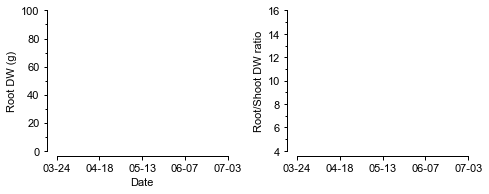

In [12]:
fig = plt.figure(figsize=((8/2.54*2.2), (6/2.54*1.2)))
grid = plt.GridSpec(1, 2)

ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 10))
ax0.spines['bottom'].set_position(('outward', 5))
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_position(('outward', 10))
ax1.spines['bottom'].set_position(('outward', 5))

ax0.set_xbound(weight_df.index.min(), weight_df.index.max())
ax0.xaxis.set_major_locator(LinearLocator(5))
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xbound(weight_df.index.min(), weight_df.index.max())
ax1.xaxis.set_major_locator(LinearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax0.yaxis.set_major_locator(LinearLocator(6))
ax0.yaxis.set_minor_locator(LinearLocator(11))
ax0.set_ybound(0, 100)
ax1.yaxis.set_major_locator(LinearLocator(7))
ax1.yaxis.set_minor_locator(LinearLocator(13))
ax1.set_ybound(4, 16)

ax0.set_xlabel('Date')
ax0.set_ylabel('Root DW (g)')
ax1.set_ylabel('Root/Shoot DW ratio')


fig.tight_layout()
# fig.savefig('./figures/Fig1-4.svg', transparent=True, format='svg')
fig.savefig('./figures/Fig1-4.png', transparent=True, dpi=600, format='png')
plt.show()

#  Fig. 1-planB

In [13]:
weight_er_df = weight_df.groupby(weight_df.index).std()
weight_avg_df = weight_df.groupby(weight_df.index).mean()

In [14]:
weight_avg_df.columns

Index(['Stem FW', 'Leaf FW', 'petiole FW', 'Fruit count', 'Idv fruit FW',
       'Plant height', 'Fruit DW', 'Leaf DW', 'Stem DW', 'petiole DW',
       'root DW', 'root FW'],
      dtype='object')

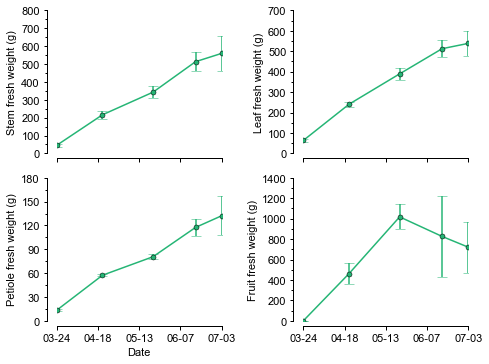

In [15]:
fig = plt.figure(figsize=((8/2.54*2.2), (6/2.54*2.2)))
grid = plt.GridSpec(2, 2)

ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])
ax2 = plt.subplot(grid[2])
ax3 = plt.subplot(grid[3])

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 10))
ax0.spines['bottom'].set_position(('outward', 5))
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_position(('outward', 10))
ax1.spines['bottom'].set_position(('outward', 5))
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_position(('outward', 10))
ax2.spines['bottom'].set_position(('outward', 5))
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_position(('outward', 10))
ax3.spines['bottom'].set_position(('outward', 5))

ax0.errorbar(weight_avg_df.index, weight_avg_df['Stem FW'], yerr=weight_er_df['Stem FW'], marker='o', capsize=5, ms=5, c=cmap[3], mec='k', mew=0.5)
ax1.errorbar(weight_avg_df.index, weight_avg_df['Leaf FW'], yerr=weight_er_df['Leaf FW'], marker='o', capsize=5, ms=5, c=cmap[3], mec='k', mew=0.5)
ax2.errorbar(weight_avg_df.index, weight_avg_df['petiole FW'], yerr=weight_er_df['petiole FW'], marker='o', capsize=5, ms=5, c=cmap[3], mec='k', mew=0.5)
ax3.errorbar(weight_avg_df.index, weight_avg_df['Idv fruit FW'], yerr=weight_er_df['Idv fruit FW'], marker='o', capsize=5, ms=5, c=cmap[3], mec='k', mew=0.5)

ax0.set_xbound(weight_avg_df.index.min(), weight_avg_df.index.max())
ax0.xaxis.set_major_locator(LinearLocator(5))
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xbound(weight_avg_df.index.min(), weight_avg_df.index.max())
ax1.xaxis.set_major_locator(LinearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax2.set_xbound(weight_avg_df.index.min(), weight_avg_df.index.max())
ax2.xaxis.set_major_locator(LinearLocator(5))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax3.set_xbound(weight_avg_df.index.min(), weight_avg_df.index.max())
ax3.xaxis.set_major_locator(LinearLocator(5))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax0.yaxis.set_major_locator(LinearLocator(9))
ax0.yaxis.set_minor_locator(LinearLocator(17))
ax0.set_ybound(0, 800)
ax1.yaxis.set_major_locator(LinearLocator(8))
ax1.yaxis.set_minor_locator(LinearLocator(15))
ax1.set_ybound(0, 700)
ax2.yaxis.set_major_locator(LinearLocator(7))
ax2.yaxis.set_minor_locator(LinearLocator(13))
ax2.set_ybound(0, 180)
ax3.yaxis.set_major_locator(LinearLocator(8))
ax3.yaxis.set_minor_locator(LinearLocator(15))
ax3.set_ybound(0, 1400)

ax0.set_ylabel('Stem fresh weight (g)')
ax1.set_ylabel('Leaf fresh weight (g)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Petiole fresh weight (g)')
ax3.set_ylabel('Fruit fresh weight (g)')

ax0.axes.xaxis.set_ticklabels([])
ax1.axes.xaxis.set_ticklabels([])

fig.tight_layout()
fig.savefig('./figures/Fig1-1.svg', transparent=True, format='svg')
plt.show()

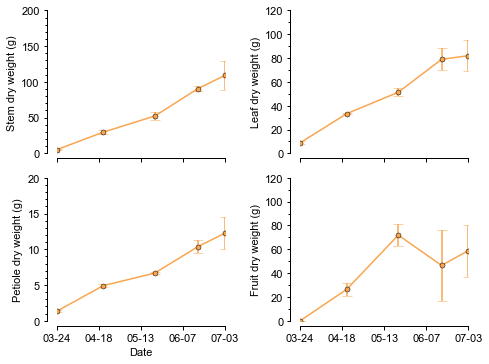

In [16]:
fig = plt.figure(figsize=((8/2.54*2.2), (6/2.54*2.2)))
grid = plt.GridSpec(2, 2)

ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])
ax2 = plt.subplot(grid[2])
ax3 = plt.subplot(grid[3])

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 10))
ax0.spines['bottom'].set_position(('outward', 5))
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_position(('outward', 10))
ax1.spines['bottom'].set_position(('outward', 5))
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_position(('outward', 10))
ax2.spines['bottom'].set_position(('outward', 5))
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_position(('outward', 10))
ax3.spines['bottom'].set_position(('outward', 5))

ax0.errorbar(weight_avg_df.index, weight_avg_df['Stem DW'], yerr=weight_er_df['Stem DW'], marker='o', capsize=5, ms=5, c=cmap[2], mec='k', mew=0.5)
ax1.errorbar(weight_avg_df.index, weight_avg_df['Leaf DW'], yerr=weight_er_df['Leaf DW'], marker='o', capsize=5, ms=5, c=cmap[2], mec='k', mew=0.5)
ax2.errorbar(weight_avg_df.index, weight_avg_df['petiole DW'], yerr=weight_er_df['petiole DW'], marker='o', capsize=5, ms=5, c=cmap[2], mec='k', mew=0.5)
ax3.errorbar(weight_avg_df.index, weight_avg_df['Fruit DW'], yerr=weight_er_df['Fruit DW'], marker='o', capsize=5, ms=5, c=cmap[2], mec='k', mew=0.5)

ax0.set_xbound(weight_avg_df.index.min(), weight_avg_df.index.max())
ax0.xaxis.set_major_locator(LinearLocator(5))
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xbound(weight_avg_df.index.min(), weight_avg_df.index.max())
ax1.xaxis.set_major_locator(LinearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax2.set_xbound(weight_avg_df.index.min(), weight_avg_df.index.max())
ax2.xaxis.set_major_locator(LinearLocator(5))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax3.set_xbound(weight_avg_df.index.min(), weight_avg_df.index.max())
ax3.xaxis.set_major_locator(LinearLocator(5))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax0.yaxis.set_major_locator(LinearLocator(5))
ax0.yaxis.set_minor_locator(LinearLocator(21))
ax0.set_ybound(0, 200)
ax1.yaxis.set_major_locator(LinearLocator(7))
ax1.yaxis.set_minor_locator(LinearLocator(13))
ax1.set_ybound(0, 120)
ax2.yaxis.set_major_locator(LinearLocator(5))
ax2.yaxis.set_minor_locator(LinearLocator(21))
ax2.set_ybound(0, 20)
ax3.yaxis.set_major_locator(LinearLocator(7))
ax3.yaxis.set_minor_locator(LinearLocator(13))
ax3.set_ybound(0, 120)

ax0.set_ylabel('Stem dry weight (g)')
ax1.set_ylabel('Leaf dry weight (g)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Petiole dry weight (g)')
ax3.set_ylabel('Fruit dry weight (g)')

ax0.axes.xaxis.set_ticklabels([])
ax1.axes.xaxis.set_ticklabels([])

fig.tight_layout()
fig.savefig('./figures/Fig1-2.svg', transparent=True, format='svg')
plt.show()

In [17]:
hv_avg_df = harvest_df.groupby(harvest_df.index).sum()

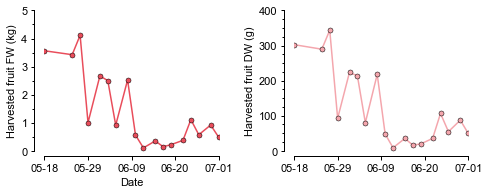

In [18]:
fig = plt.figure(figsize=((8/2.54*2.2), (6/2.54*1.2)))
grid = plt.GridSpec(1, 2)

ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 10))
ax0.spines['bottom'].set_position(('outward', 5))
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_position(('outward', 10))
ax1.spines['bottom'].set_position(('outward', 5))

ax0.errorbar(hv_avg_df.index, hv_avg_df['fw']/1000, marker='o', capsize=5, ms=5, c=cmap[0], mec='k', mew=0.5)
ax1.errorbar(hv_avg_df.index, hv_avg_df['dw'], marker='o', capsize=5, ms=5, c=cmap_m[0], mec='k', mew=0.5)

ax0.set_xbound(harvest_df.index.min(), harvest_df.index.max())
ax0.xaxis.set_major_locator(LinearLocator(5))
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xbound(harvest_df.index.min(), harvest_df.index.max())
ax1.xaxis.set_major_locator(LinearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax0.yaxis.set_major_locator(LinearLocator(6))
ax0.yaxis.set_minor_locator(LinearLocator(11))
ax0.set_ybound(0, 5)
ax1.yaxis.set_major_locator(LinearLocator(5))
ax1.yaxis.set_minor_locator(LinearLocator(17))
ax1.set_ybound(0, 400)

ax0.set_xlabel('Date')
ax0.set_ylabel('Harvested fruit FW (kg)')
ax1.set_ylabel('Harvested fruit DW (g)')

fig.tight_layout()
fig.savefig('./figures/Fig1-3.svg', transparent=True, format='svg')
plt.show()

#  Fig. 11?

In [19]:
SW2_df = pd.read_csv('../ch2_weighing/results/2020_S/SW2_greenhouse.csv', index_col='Unnamed: 0')
SW2_df.index = pd.DatetimeIndex(SW2_df.index)

In [20]:
SW2_df = SW2_df.loc['2020-03-05 00:00:00': '2020-07-03 23:59:00']
SW2_df = SW2_df.interpolate()

In [21]:
rockwool_slab = np.array([626, 708, 650, 642])
rockwool_cube = np.array([48, 46, 50, 48, 46])
rockwool = (rockwool_slab + rockwool_cube.mean()*4)/1000
rockwool_mean = rockwool.mean()

In [22]:
substrate_volume = (120*12*7.5 + 10*10*6.5*4)/1000
water_w_df = substrate_volume*SW2_df['subs_VWC']/100
SW2_df['water'] = water_w_df

In [23]:
SW2_df.loc[:, 'loadcell_1'] = SW2_df.loc[:, 'loadcell_1'] - rockwool_mean
SW2_df.loc[:, 'loadcell_2'] = SW2_df.loc[:, 'loadcell_2'] - rockwool_mean
SW2_df.loc[:, 'loadcell_3'] = SW2_df.loc[:, 'loadcell_3'] - rockwool_mean

In [24]:
weight_df = pd.read_csv('../ch2_weighing/results/2020_S/weight_ct.csv', index_col='Unnamed: 0')
weight_df.index = pd.DatetimeIndex(weight_df.index)
weight_df.index = np.append(weight_df.index[:-20], pd.DatetimeIndex(['2020-07-03']*20))

In [25]:
harvest_df = pd.read_excel('./data/harvest_FWnDW_2020S.xlsx', index_col='date', sheet_name='A2')

# fruit_df = weight_df[['Idv fruit FW', 'Fruit DW']].dropna()
# fruit_df.columns = harvest_df.columns

# harvest_df = pd.concat([harvest_df, fruit_df], axis=0)
harvest_df = harvest_df.sort_index()
# harvest_df = harvest_df.iloc[3:]

In [26]:
roots_DW = np.array([301.25, 293.55, 315.15, 356.45, 341.55, 267.65, 303.55, 231.05, 253.05, 272.35, 334.35])/1000
roots_DW_mean = roots_DW.mean()
rs_ratio_df = pd.DataFrame([0.23255813953488372, 0.14789272030651343, 0.11954022988505748, 0.13678160919540233, 0.2835814088817321], index=weight_df.index.unique(), columns=['RS_ratio'])
DW_sum_df = weight_df[[col for col in weight_df.columns if col.endswith('DW')]].sum(axis=1).groupby(weight_df.index).mean()

In [27]:
roots_df = (DW_sum_df.T * rs_ratio_df.T).T
roots_df.columns = ['root DW']
roots_df['root FW'] = roots_df['root DW']/0.1325
roots_df.index = pd.DatetimeIndex(roots_df.index)

In [28]:
weight_df = pd.concat([weight_df, roots_df], axis=1)

In [29]:
ratio_df = [weight_df['Stem FW']/weight_df['Stem DW'].interpolate(),
            weight_df['Leaf FW']/weight_df['Leaf DW'].interpolate(),
            weight_df['petiole FW']/weight_df['petiole DW'].interpolate(),
            weight_df['Idv fruit FW']/weight_df['Fruit DW'].interpolate(),
            weight_df['root FW']/weight_df['root DW'].interpolate()
           ]
ratio_df = pd.concat(ratio_df, axis=1)

In [30]:
ratio_df.columns = ['stem', 'leaf', 'pet', 'fruit', 'root']

In [31]:
ratio_df.iloc[1, 0] = np.nan
ratio_df.iloc[-17, 2] = np.nan
ratio_df.iloc[-12:-10, 2] = np.nan

In [32]:
ratio_avg_df = ratio_df.groupby(ratio_df.index).mean()
ratio_er_df = ratio_df.groupby(ratio_df.index).std()

In [33]:
ratio_df = ratio_df[ratio_df < 30]

In [34]:
fruit_ratio = harvest_df['fw']/harvest_df['dw']

In [35]:
fruit_ratio_avg = fruit_ratio.groupby(fruit_ratio.index).mean()
fruit_ratio_er = fruit_ratio.groupby(fruit_ratio.index).std()

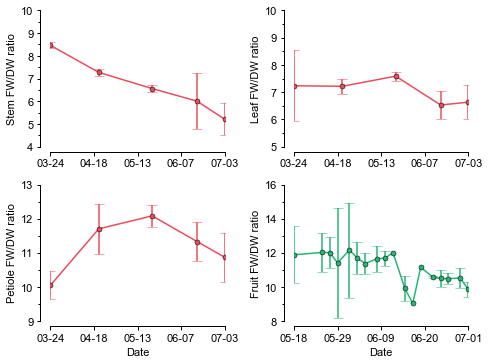

In [36]:
fig = plt.figure(figsize=((8/2.54*2.2), (6/2.54*2.2)))
grid = plt.GridSpec(2, 2)

ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])
ax2 = plt.subplot(grid[2])
ax3 = plt.subplot(grid[3])

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 10))
ax0.spines['bottom'].set_position(('outward', 5))
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_position(('outward', 10))
ax1.spines['bottom'].set_position(('outward', 5))
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_position(('outward', 10))
ax2.spines['bottom'].set_position(('outward', 5))
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_position(('outward', 10))
ax3.spines['bottom'].set_position(('outward', 5))

ax0.errorbar(ratio_avg_df.index, ratio_avg_df['stem'], yerr=ratio_er_df['stem'], marker='o', capsize=5, ms=5, c=cmap[0], mec='k', mew=0.5)
ax1.errorbar(ratio_avg_df.index, ratio_avg_df['leaf'], yerr=ratio_er_df['leaf'], marker='o', capsize=5, ms=5, c=cmap[0], mec='k', mew=0.5)
ax2.errorbar(ratio_avg_df.index, ratio_avg_df['pet'], yerr=ratio_er_df['pet'], marker='o', capsize=5, ms=5, c=cmap[0], mec='k', mew=0.5)
# ax3.errorbar(ratio_avg_df.index, ratio_avg_df['fruit'], yerr=ratio_er_df['fruit'], marker='o', capsize=5, ms=5, c=cmap[0], mec='k', mew=0.5)
ax3.errorbar(fruit_ratio_avg.index, fruit_ratio_avg, yerr=fruit_ratio_er, marker='o', capsize=5, ms=5, c=cmap[3], mec='k', mew=0.5)

ax0.set_xbound(ratio_df.index.min(), ratio_df.index.max())
ax0.xaxis.set_major_locator(LinearLocator(5))
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xbound(ratio_df.index.min(), ratio_df.index.max())
ax1.xaxis.set_major_locator(LinearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax2.set_xbound(ratio_df.index.min(), ratio_df.index.max())
ax2.xaxis.set_major_locator(LinearLocator(5))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax3.set_xbound(fruit_ratio_avg.index.min(), fruit_ratio_avg.index.max())
ax3.xaxis.set_major_locator(LinearLocator(5))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax0.yaxis.set_major_locator(LinearLocator(7))
ax0.yaxis.set_minor_locator(LinearLocator(13))
ax0.set_ybound(4, 10)
ax1.yaxis.set_major_locator(LinearLocator(6))
ax1.yaxis.set_minor_locator(LinearLocator(11))
ax1.set_ybound(5, 10)
ax2.yaxis.set_major_locator(LinearLocator(5))
ax2.yaxis.set_minor_locator(LinearLocator(9))
ax2.set_ybound(9, 13)
ax3.yaxis.set_major_locator(LinearLocator(5))
ax3.yaxis.set_minor_locator(LinearLocator(9))
ax3.set_ybound(8, 16)

ax0.set_ylabel('Stem FW/DW ratio')
ax1.set_ylabel('Leaf FW/DW ratio')
ax2.set_xlabel('Date')
ax2.set_ylabel('Petiole FW/DW ratio')
ax3.set_xlabel('Date')
ax3.set_ylabel('Fruit FW/DW ratio')

fig.tight_layout()
fig.savefig('./figures/Fig1.svg', transparent=True, format='svg')
plt.show()

#  Fig. 3

In [37]:
harvest_df1 = pd.read_excel('./data/A2_fruit_20200226-20200703.xlsx', index_col='Day of harvest')
harvest_df1 = harvest_df1.resample('7d').sum()

In [38]:
temp_df1 = pd.read_excel('./data/A2A3_fruit_20200102.xlsx', sheet_name='CT_L', index_col='Day of harvest').drop(['Treatments'], axis=1)
temp_df2 = pd.read_excel('./data/A2A3_fruit_20200102.xlsx', sheet_name='CT_R', index_col='Day of harvest').drop(['Treatments'], axis=1)
harvest_df2 = pd.concat([temp_df1, temp_df2])
harvest_df2 = harvest_df2.resample('7d').sum()

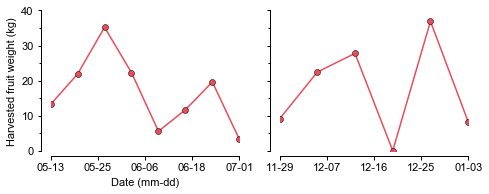

In [39]:
fig = plt.figure(figsize=((8/2.54*2.2), (6/2.54*1.2)))
grid = plt.GridSpec(1, 2)

ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 10))
ax0.spines['bottom'].set_position(('outward', 5))
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_position(('outward', 10))
ax1.spines['bottom'].set_position(('outward', 5))

ax0.plot(harvest_df1.index, harvest_df1['Fresh weight']/1000, '-o', mec='k', mew=0.5, c=cmap[0])
ax1.plot(harvest_df2.index, harvest_df2['Fresh weight']/1000, '-o', mec='k', mew=0.5, c=cmap[0])

ax0.set_xbound(harvest_df1.index.min(), harvest_df1.index.max())
ax0.xaxis.set_major_locator(LinearLocator(5))
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax0.yaxis.set_major_locator(LinearLocator(5))
ax0.yaxis.set_minor_locator(LinearLocator(9))
ax1.set_xbound(harvest_df2.index.min(), harvest_df2.index.max())
ax1.xaxis.set_major_locator(LinearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.yaxis.set_major_locator(LinearLocator(5))
ax1.yaxis.set_minor_locator(LinearLocator(9))
ax0.set_ybound(0, 40)
ax1.set_ybound(0, 40)

ax1.axes.yaxis.set_ticklabels([])

ax0.set_xlabel('Date (mm-dd)')
ax0.set_ylabel('Harvested fruit weight (kg)')

fig.tight_layout()
fig.savefig('./figures/Fig3.svg', transparent=True, format='svg')
plt.show()

#  Fig. 4

In [40]:
label_df = pd.read_csv('./results/model_output/transformer_label.csv', index_col='Unnamed: 0').sort_index()*1000
pred_df = pd.read_csv('./results/model_output/transformer_pred.csv', index_col='Unnamed: 0').sort_index()*1000
label_df.index = pd.DatetimeIndex(label_df.index)
pred_df.index = pd.DatetimeIndex(pred_df.index)

In [41]:
label_df = label_df.groupby(label_df.index).mean()
pred_df = pred_df.groupby(pred_df.index).mean()

In [42]:
weight_er_df['tot_fw'] = weight_df.loc[:, 'Stem FW':'Idv fruit FW'].sum(axis=1).groupby(weight_df.index).std()
weight_er_df['tot_dw'] = weight_df.loc[:, 'Fruit DW':'petiole DW'].sum(axis=1).groupby(weight_df.index).std()

In [43]:
pred_df['tot_dw'] = pred_df[['stem_dw', 'leaf_dw', 'petiole_dw', 'fruit_dw']].sum(axis=1)

In [44]:
pred_df.loc[pred_df['harvest_fw'] < 0, 'harvest_fw'] = 0
pred_df.loc[pred_df['harvest_dw'] < 0, 'harvest_dw'] = 0

In [45]:
weight_avg_df['tot_fw'] = weight_avg_df.loc[:, 'Stem FW':'Idv fruit FW'].sum(axis=1)
weight_avg_df['tot_dw'] = weight_avg_df.loc[:, 'Fruit DW':'petiole DW'].sum(axis=1)

In [46]:
pred_df.rolling(5).mean()

,tot_fw,stem_fw,leaf_fw,petiole_fw,fruit_fw,harvest_fw,stem_dw,leaf_dw,petiole_dw,fruit_dw,harvest_dw,tot_dw
2020-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-23,533.925556,166.420277,229.039199,49.062834,57.095889,192.298151,7375.732259,10940.963760,1602.547567,4638.603408,9.978542,24557.846994
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-28,2140.290592,496.150343,511.381408,115.975839,1031.593832,1881.657348,81059.609088,72175.128317,9701.143725,64985.154150,155.432511,227921.035281
2020-06-29,2140.365240,496.148928,511.360281,115.984345,1031.565407,1895.141735,81028.465783,72153.300593,9699.095027,64967.792959,190.623682,227848.654363
2020-06-30,2141.993427,496.539362,511.693882,116.047434,1032.770091,1974.441607,81162.408477,72267.042137,9711.461727,65063.018827,186.690420,228203.931168
2020-07-02,2151.459762,498.463947,513.345314,116.449729,1038.536523,1908.619797,81562.139674,72601.668256,9757.348253,65408.553350,168.604043,229329.709533


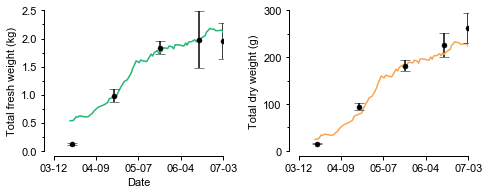

In [47]:
fig = plt.figure(figsize=((8/2.54*2.2), (6/2.54*1.2)))
grid = plt.GridSpec(1, 2)

ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 10))
ax0.spines['bottom'].set_position(('outward', 5))
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_position(('outward', 10))
ax1.spines['bottom'].set_position(('outward', 5))

ax0.plot(pred_df.index, pred_df.rolling(5).mean()['tot_fw']/1000, ms=5, c=cmap[3], mec='k', mew=0.5)
ax1.plot(pred_df.index, pred_df.rolling(5).mean()['tot_dw']/1000, ms=5, c=cmap[2], mec='k', mew=0.5)

ax0.errorbar(weight_avg_df.index, weight_avg_df['tot_fw']/1000, yerr=weight_er_df['tot_fw']/1000, fmt='o', capsize=5, ms=5, c='k', mew=0.5)
ax1.errorbar(weight_avg_df.index, weight_avg_df['tot_dw'], yerr=weight_er_df['tot_dw'], fmt='o', capsize=5, ms=5, c='k', mew=0.5)

ax0.set_xbound(pred_df.index.min(), pred_df.index.max())
ax0.xaxis.set_major_locator(LinearLocator(5))
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xbound(pred_df.index.min(), pred_df.index.max())
ax1.xaxis.set_major_locator(LinearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax0.yaxis.set_major_locator(LinearLocator(6))
ax0.yaxis.set_minor_locator(LinearLocator(11))
ax0.set_ybound(0, 2.5)
ax1.yaxis.set_major_locator(LinearLocator(4))
ax1.yaxis.set_minor_locator(LinearLocator(7))
ax1.set_ybound(0, 300)

ax0.set_ylabel('Total fresh weight (kg)')
ax1.set_ylabel('Total dry weight (g)')
ax0.set_xlabel('Date')

fig.tight_layout()
fig.savefig('./figures/Fig4-1.svg', transparent=True, format='svg')
plt.show()

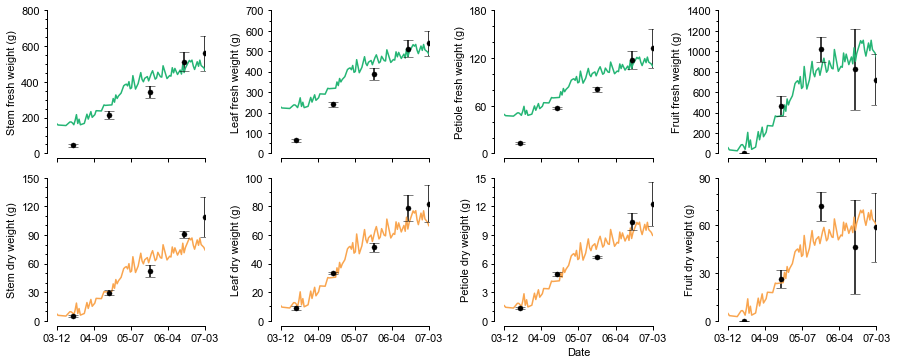

In [48]:
fig = plt.figure(figsize=((8/2.54*4), (6/2.54*2.2)))
grid = plt.GridSpec(2, 4)

ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])
ax2 = plt.subplot(grid[2])
ax3 = plt.subplot(grid[3])
ax4 = plt.subplot(grid[4])
ax5 = plt.subplot(grid[5])
ax6 = plt.subplot(grid[6])
ax7 = plt.subplot(grid[7])

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 10))
ax0.spines['bottom'].set_position(('outward', 5))
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_position(('outward', 10))
ax1.spines['bottom'].set_position(('outward', 5))
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_position(('outward', 10))
ax2.spines['bottom'].set_position(('outward', 5))
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_position(('outward', 10))
ax3.spines['bottom'].set_position(('outward', 5))
ax4.spines['right'].set_visible(False)
ax4.spines['left'].set_position(('outward', 10))
ax4.spines['bottom'].set_position(('outward', 5))
ax5.spines['right'].set_visible(False)
ax5.spines['left'].set_position(('outward', 10))
ax5.spines['bottom'].set_position(('outward', 5))
ax6.spines['right'].set_visible(False)
ax6.spines['left'].set_position(('outward', 10))
ax6.spines['bottom'].set_position(('outward', 5))
ax7.spines['right'].set_visible(False)
ax7.spines['left'].set_position(('outward', 10))
ax7.spines['bottom'].set_position(('outward', 5))

ax0.plot(pred_df.index, pred_df['stem_fw'], ms=5, c=cmap[3], mec='k', mew=0.5)
ax1.plot(pred_df.index, pred_df['leaf_fw'], ms=5, c=cmap[3], mec='k', mew=0.5)
ax2.plot(pred_df.index, pred_df['petiole_fw'], ms=5, c=cmap[3], mec='k', mew=0.5)
ax3.plot(pred_df.index, pred_df['fruit_fw'], ms=5, c=cmap[3], mec='k', mew=0.5)

ax0.errorbar(weight_avg_df.index, weight_avg_df['Stem FW'], yerr=weight_er_df['Stem FW'], fmt='o', capsize=5, ms=5, c='k', mew=0.5)
ax1.errorbar(weight_avg_df.index, weight_avg_df['Leaf FW'], yerr=weight_er_df['Leaf FW'], fmt='o', capsize=5, ms=5, c='k', mew=0.5)
ax2.errorbar(weight_avg_df.index, weight_avg_df['petiole FW'], yerr=weight_er_df['petiole FW'], fmt='o', capsize=5, ms=5, c='k', mew=0.5)
ax3.errorbar(weight_avg_df.index, weight_avg_df['Idv fruit FW'], yerr=weight_er_df['Idv fruit FW'], fmt='o', capsize=5, ms=5, c='k', mew=0.5)

ax4.plot(pred_df.index, pred_df['stem_dw']/1000, ms=5, c=cmap[2], mec='k', mew=0.5)
ax5.plot(pred_df.index, pred_df['leaf_dw']/1000, ms=5, c=cmap[2], mec='k', mew=0.5)
ax6.plot(pred_df.index, pred_df['petiole_dw']/1000, ms=5, c=cmap[2], mec='k', mew=0.5)
ax7.plot(pred_df.index, pred_df['fruit_dw']/1000, ms=5, c=cmap[2], mec='k', mew=0.5)

ax4.errorbar(weight_avg_df.index, weight_avg_df['Stem DW'], yerr=weight_er_df['Stem DW'], fmt='o', capsize=5, ms=5, c='k', mew=0.5)
ax5.errorbar(weight_avg_df.index, weight_avg_df['Leaf DW'], yerr=weight_er_df['Leaf DW'], fmt='o', capsize=5, ms=5, c='k', mew=0.5)
ax6.errorbar(weight_avg_df.index, weight_avg_df['petiole DW'], yerr=weight_er_df['petiole DW'], fmt='o', capsize=5, ms=5, c='k', mew=0.5)
ax7.errorbar(weight_avg_df.index, weight_avg_df['Fruit DW'], yerr=weight_er_df['Fruit DW'], fmt='o', capsize=5, ms=5, c='k', mew=0.5)

ax0.set_xbound(pred_df.index.min(), pred_df.index.max())
ax0.xaxis.set_major_locator(LinearLocator(5))
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xbound(pred_df.index.min(), pred_df.index.max())
ax1.xaxis.set_major_locator(LinearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax2.set_xbound(pred_df.index.min(), pred_df.index.max())
ax2.xaxis.set_major_locator(LinearLocator(5))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax3.set_xbound(pred_df.index.min(), pred_df.index.max())
ax3.xaxis.set_major_locator(LinearLocator(5))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax4.set_xbound(pred_df.index.min(), pred_df.index.max())
ax4.xaxis.set_major_locator(LinearLocator(5))
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax5.set_xbound(pred_df.index.min(), pred_df.index.max())
ax5.xaxis.set_major_locator(LinearLocator(5))
ax5.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax6.set_xbound(pred_df.index.min(), pred_df.index.max())
ax6.xaxis.set_major_locator(LinearLocator(5))
ax6.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax7.set_xbound(pred_df.index.min(), pred_df.index.max())
ax7.xaxis.set_major_locator(LinearLocator(5))
ax7.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax0.yaxis.set_major_locator(LinearLocator(5))
ax0.yaxis.set_minor_locator(LinearLocator(17))
ax0.set_ybound(0, 800)
ax1.yaxis.set_major_locator(LinearLocator(8))
ax1.yaxis.set_minor_locator(LinearLocator(15))
ax1.set_ybound(0, 700)
ax2.yaxis.set_major_locator(LinearLocator(4))
ax2.yaxis.set_minor_locator(LinearLocator(10))
ax2.set_ybound(0, 180)
ax3.yaxis.set_major_locator(LinearLocator(8))
ax3.yaxis.set_minor_locator(LinearLocator(15))
ax3.set_ybound(0, 1400)

ax4.yaxis.set_major_locator(LinearLocator(6))
ax4.yaxis.set_minor_locator(LinearLocator(16))
ax4.set_ybound(0, 150)
ax5.yaxis.set_major_locator(LinearLocator(6))
ax5.yaxis.set_minor_locator(LinearLocator(11))
ax5.set_ybound(0, 100)
ax6.yaxis.set_major_locator(LinearLocator(6))
ax6.yaxis.set_minor_locator(LinearLocator(16))
ax6.set_ybound(0, 15)
ax7.yaxis.set_major_locator(LinearLocator(4))
ax7.yaxis.set_minor_locator(LinearLocator(10))
ax7.set_ybound(0, 90)

ax0.set_ylabel('Stem fresh weight (g)')
ax1.set_ylabel('Leaf fresh weight (g)')
ax2.set_ylabel('Petiole fresh weight (g)')
ax3.set_ylabel('Fruit fresh weight (g)')

ax4.set_ylabel('Stem dry weight (g)')
ax5.set_ylabel('Leaf dry weight (g)')
ax6.set_xlabel('Date')
ax6.set_ylabel('Petiole dry weight (g)')
ax7.set_ylabel('Fruit dry weight (g)')

ax0.axes.xaxis.set_ticklabels([])
ax1.axes.xaxis.set_ticklabels([])
ax2.axes.xaxis.set_ticklabels([])
ax3.axes.xaxis.set_ticklabels([])

fig.tight_layout()
fig.savefig('./figures/Fig4-2.svg', transparent=True, format='svg')
plt.show()

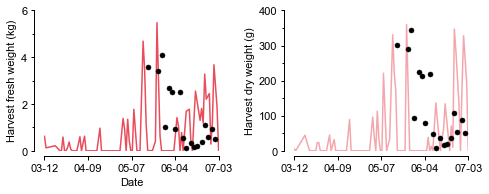

In [49]:
fig = plt.figure(figsize=((8/2.54*2.2), (6/2.54*1.2)))
grid = plt.GridSpec(1, 2)

ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 10))
ax0.spines['bottom'].set_position(('outward', 5))
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_position(('outward', 10))
ax1.spines['bottom'].set_position(('outward', 5))

ax0.plot(pred_df.index, pred_df['harvest_fw']/1000, '-', ms=5, c=cmap[0], mec='k', mew=0.5)
ax1.plot(pred_df.index, pred_df['harvest_dw'], '-', ms=5, c=cmap_m[0], mec='k', mew=0.5)

ax0.errorbar(hv_avg_df.index, hv_avg_df['fw']/1000, fmt='o', capsize=5, ms=5, c='k', mew=0.5)
ax1.errorbar(hv_avg_df.index, hv_avg_df['dw'], fmt='o', capsize=5, ms=5, c='k', mew=0.5)

ax0.set_xbound(pred_df.index.min(), pred_df.index.max())
ax0.xaxis.set_major_locator(LinearLocator(5))
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xbound(pred_df.index.min(), pred_df.index.max())
ax1.xaxis.set_major_locator(LinearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax0.yaxis.set_major_locator(LinearLocator(4))
ax0.yaxis.set_minor_locator(LinearLocator(7))
ax0.set_ybound(0, 6)
ax1.yaxis.set_major_locator(LinearLocator(5))
ax1.yaxis.set_minor_locator(LinearLocator(9))
ax1.set_ybound(0, 400)

ax0.set_ylabel('Harvest fresh weight (kg)')
ax1.set_ylabel('Harvest dry weight (g)')
ax0.set_xlabel('Date')

fig.tight_layout()
fig.savefig('./figures/Fig4-3.svg', transparent=True, format='svg')
plt.show()